In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cargar dataset
df = pd.read_csv('Dataset-Telco-Customer-Churn.csv')

# Mostrar las primeras filas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Resumen general del dataset

In [2]:
# Información general y tipos de datos
df.info()

# Estadísticas descriptivas para variables numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Análisis de variables categóricas principales

In [3]:
# Conteo de valores para variables categóricas seleccionadas
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    print(f'\nConteo de valores para {col}:')
    print(df[col].value_counts())
    print('-'*40)


Conteo de valores para gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------

Conteo de valores para SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
----------------------------------------

Conteo de valores para Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------

Conteo de valores para Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------

Conteo de valores para PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------

Conteo de valores para MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------

Conteo de valores para InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526


### Visualización de la distribución de la variable objetivo (Churn)

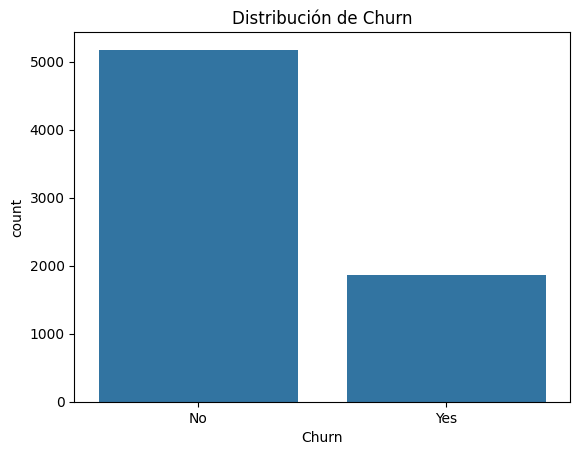

In [4]:
# Distribución de la variable Churn
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.show()

### Análisis de variables numéricas principales

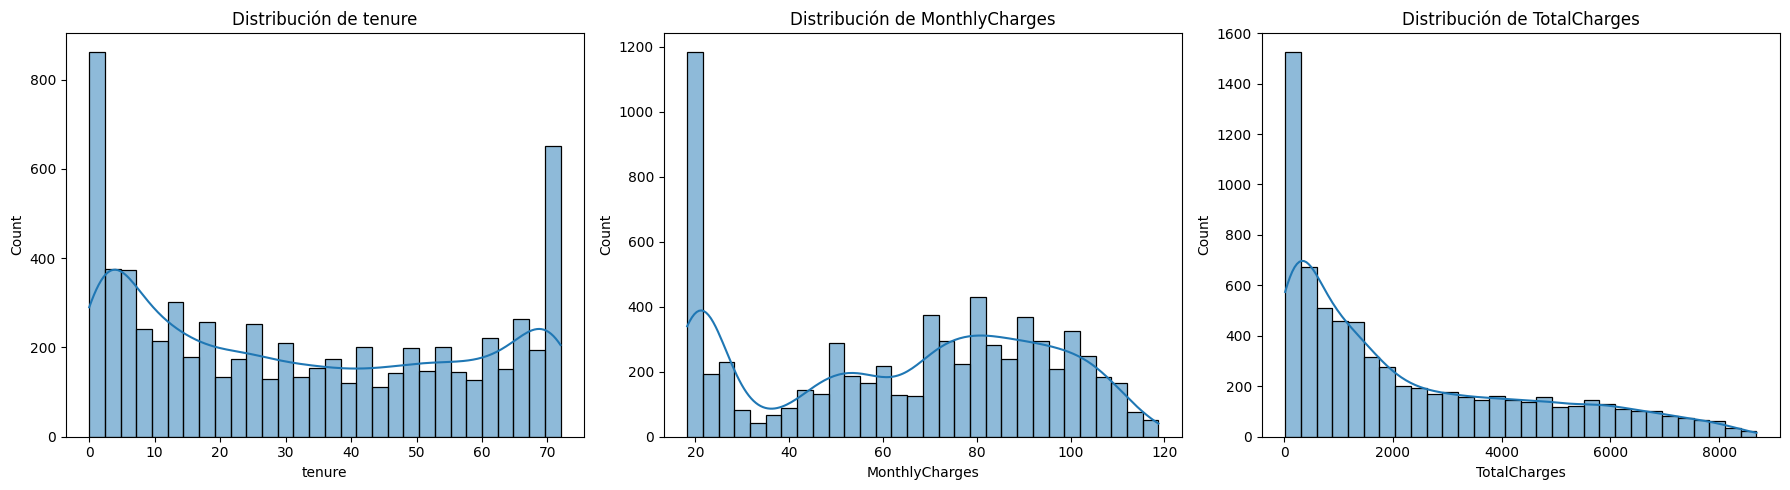

In [5]:
# Histograma de tenure, MonthlyCharges y TotalCharges
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['tenure'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribución de tenure')
sns.histplot(df['MonthlyCharges'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribución de MonthlyCharges')
sns.histplot(df['TotalCharges'].replace(' ', pd.NA).dropna().astype(float), bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribución de TotalCharges')
plt.tight_layout()
plt.show()

### Relación entre variables numéricas y Churn

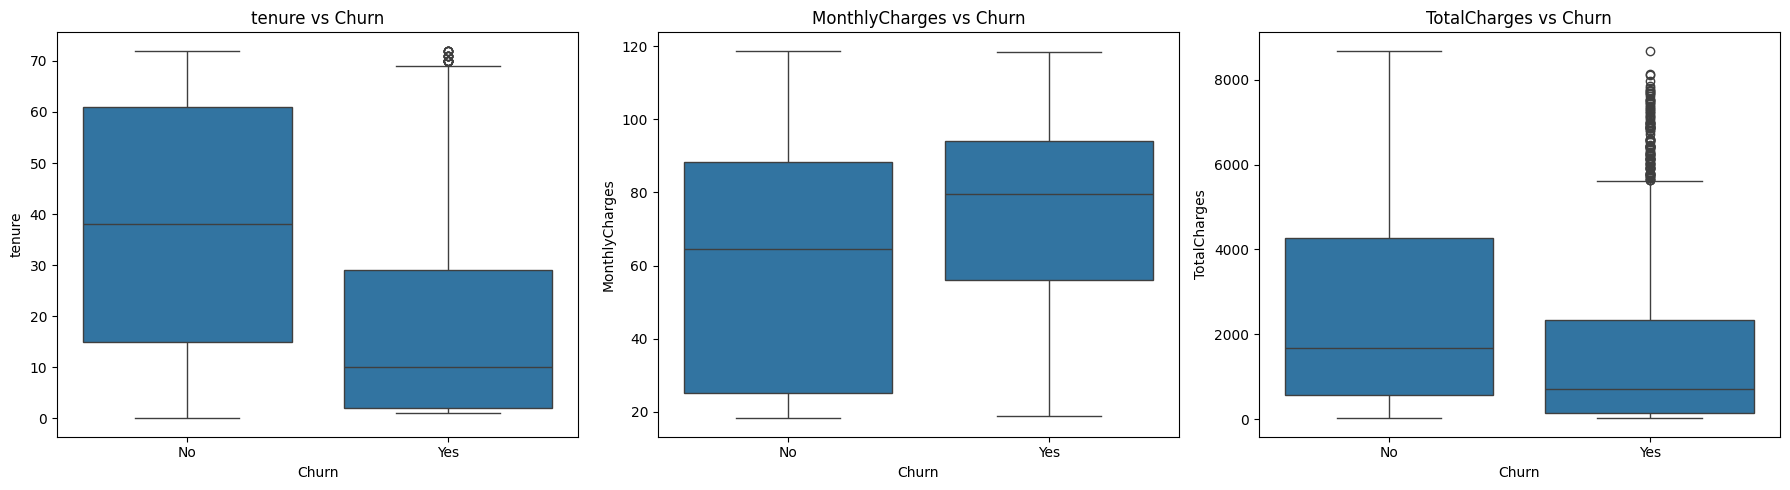

In [6]:
# Boxplots para tenure, MonthlyCharges y TotalCharges según Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('tenure vs Churn')
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('MonthlyCharges vs Churn')
sns.boxplot(x='Churn', y=df['TotalCharges'].replace(' ', pd.NA).dropna().astype(float), data=df, ax=axes[2])
axes[2].set_title('TotalCharges vs Churn')
plt.tight_layout()
plt.show()